Estudiaremos en este módulo como calcular transformadas integrales de Fourier.  


Si $f(x)$ es una función definida en $(-\infty, \infty)$ la transformada de Fourier exponencial es:
$$
F(k)=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty} f(x)\ {\rm e}^{-ikx} {\rm d}x
\,\, \Leftrightarrow \,\, 
f(x)=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty} F(k)\ {\rm e}^{ikx} {\rm d}k\,.
$$

Veamos algunos ejemplos:


In [1]:
import sympy
from sympy import *
init_printing()

1. Consideremos la siguiente función: 
$$
f=x {\rm e}^{-x^2} \,, \quad \text{con  }  x \in (-\infty, \infty) \,.
$$

In [2]:
x,k = symbols('x k', positive=True)
f = x*exp(-x**2)
f

Podemos intentar resolver la integral que define la transformada de Fourier de manera ``manual'' o directa:
$$
F(k)=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty} f(x)\ {\rm e}^{-ikx} {\rm d}x
$$

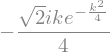

In [3]:
F1=(1/(sqrt(2*pi))*integrate(exp(-I*k*x)*f,(x,-oo,oo))).factor()
F1

O utilizar la función de SymPy "fourier_transform"

In [4]:
F1s = fourier_transform(f, x, k,simplify=True)
F1s

La transformada inversa

In [5]:
inverse_fourier_transform(F1s, k, x)

2. Consideremos ahora la siguiente función par: 
$$
g(x)=x^2 {\rm e}^{-|x|} \,, \quad \text{con  }  x \in (-\infty, \infty) \,.
$$

In [6]:
g= x**2*exp(-abs(x))
g

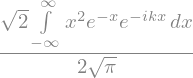

In [7]:
1/(sqrt(2*pi))*integrate(exp(-I*k*x)*g,(x,-oo,oo))

SymPy no pudo hallar la integral

In [8]:
fourier_transform(g, x, k)

Y tampoco fuciona  "fourier_transform"

Pero notemos que se puede encontrar la tansformada coseno de de Fourier:

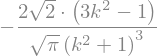

In [9]:
H=cosine_transform(g, x, k,simplify=True )
H.factor()

Salvo constantes, la transformada inversa de esta función es  $g(x)$

In [10]:
inverse_fourier_transform(H, k, x)

3.  Consideremos la siguiente función impar:
$$
f=x e^{-|x|} \,.
$$

In [11]:
f=x*exp(-abs(x))
f

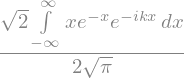

In [12]:
1/(sqrt(2*pi))*integrate(exp(-I*k*x)*f,(x,-oo,oo))

In [13]:
fourier_transform(f, x, k)

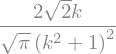

In [14]:
G=sine_transform(f, x, k,simplify=True )
G.factor()

In [15]:
inverse_fourier_transform(G, k, x)

De nuevo, la transformada inversa de esta función es la función original.

4.  Resolvamos ahora el ejemplo \ref{ejemplo5s35} donde la función era:
$$
f(t)=\sin (\omega_0 t) \,.
$$

In [16]:
ω0,t,n,ω = symbols('ω0 t n ω', real=True)
f = sin(ω0*t)
f

In [17]:
sine_transform(f, t, k,simplify=True )

In [18]:
τ = n*pi/ω0
τ

Podemos intentar hacer la integral:
$$
\sqrt{\frac{{2}}{\pi}} \int_{0}^{\tau}\sin(tω)f(t) \ dt
$$

In [19]:
res=sqrt(2/pi)*(integrate(sin(t*ω)*f,(t,0,τ)))
res

   ⎛⎧                         0                                   for (ω = 0 ∧
   ⎜⎪                                                                         
   ⎜⎪         2               2                                               
   ⎜⎪  π⋅n⋅sin (π⋅n)   π⋅n⋅cos (π⋅n)   sin(π⋅n)⋅cos(π⋅n)                      
   ⎜⎪- ───────────── - ───────────── + ─────────────────  for (ω = 0 ∧ ω = -ω₀
   ⎜⎪       2⋅ω₀            2⋅ω₀              2⋅ω₀                            
   ⎜⎪                                                                         
   ⎜⎪        2               2                                                
   ⎜⎪ π⋅n⋅sin (π⋅n)   π⋅n⋅cos (π⋅n)   sin(π⋅n)⋅cos(π⋅n)                       
√2⋅⎜⎨ ───────────── + ───────────── - ─────────────────                       
   ⎜⎪      2⋅ω₀            2⋅ω₀              2⋅ω₀                             
   ⎜⎪                                                                         
   ⎜⎪                ⎛π⋅n⋅ω⎞         ⎛π⋅n⋅ω⎞        

In [20]:
partes=piecewise_fold(res)
print(partes)

Piecewise((0, (Eq(ω, 0) & Eq(ω0, 0)) | (Eq(ω, 0) & Eq(ω, ω0) & Eq(ω0, 0)) | (Eq(ω, 0) & Eq(ω0, 0) & Eq(ω, -ω0)) | (Eq(ω, 0) & Eq(ω, ω0) & Eq(ω0, 0) & Eq(ω, -ω0))), (sqrt(2)*(-pi*n*sin(pi*n)**2/(2*ω0) - pi*n*cos(pi*n)**2/(2*ω0) + sin(pi*n)*cos(pi*n)/(2*ω0))/sqrt(pi), Eq(ω, -ω0) | (Eq(ω, 0) & Eq(ω, -ω0)) | (Eq(ω, ω0) & Eq(ω, -ω0)) | (Eq(ω0, 0) & Eq(ω, -ω0)) | (Eq(ω, 0) & Eq(ω, ω0) & Eq(ω, -ω0)) | (Eq(ω, ω0) & Eq(ω0, 0) & Eq(ω, -ω0))), (sqrt(2)*(pi*n*sin(pi*n)**2/(2*ω0) + pi*n*cos(pi*n)**2/(2*ω0) - sin(pi*n)*cos(pi*n)/(2*ω0))/sqrt(pi), Eq(ω, ω0) | (Eq(ω, 0) & Eq(ω, ω0)) | (Eq(ω, ω0) & Eq(ω0, 0))), (sqrt(2)*(ω*sin(pi*n)*cos(pi*n*ω/ω0)/(-ω**2 + ω0**2) - ω0*sin(pi*n*ω/ω0)*cos(pi*n)/(-ω**2 + ω0**2))/sqrt(pi), True))


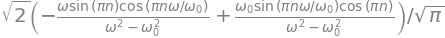

In [21]:
F=(sqrt(2)*(-ω*sin(pi*n)*cos(pi*n*ω/ω0)/(ω**2 - ω0**2) + ω0*sin(pi*n*ω/ω0)*cos(pi*n)/(ω**2 - ω0**2))/sqrt(pi))
F

In [22]:
n=6
ω0=pi

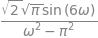

In [23]:
F=(sqrt(2)*(-ω*sin(pi*n)*cos(pi*n*ω/ω0)/(ω**2 - ω0**2) + ω0*sin(pi*n*ω/ω0)*cos(pi*n)/(ω**2 - ω0**2))/sqrt(pi))
F

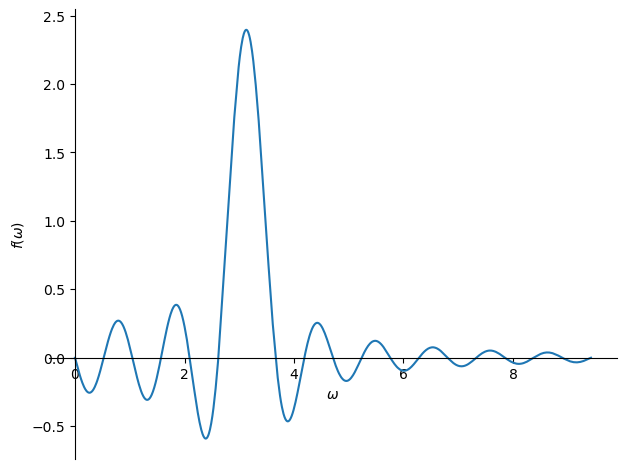

In [24]:
plot(F,(ω,0,3*pi))